<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis, oft referred to as EDA. EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

---

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [4]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [28]:
sat_filepath = '/Users/edwardlee/Desktop/DSI-SF-2-azedlee/sat_scores.csv'

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [6]:
df = pd.read_csv(sat_filepath)

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
df.head(10)

# The data contains the participation rate and the average verbal and math for each state.

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [8]:
sat_data_dict = pd.DataFrame(
    [
        ['state', 'text', 'USA state'],
        ['rate', 'integer', 'state participation rate'],
        ['verbal', 'integer', 'average verbal score'],
        ['math', 'integer', 'average math score']
        ],
        columns=['field_name', 'data_type', 'other_info']
)
sat_data_dict

,field_name,data_type,other_info
0,state,text,USA state
1,rate,integer,state participation rate
2,verbal,integer,average verbal score
3,math,integer,average math score


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

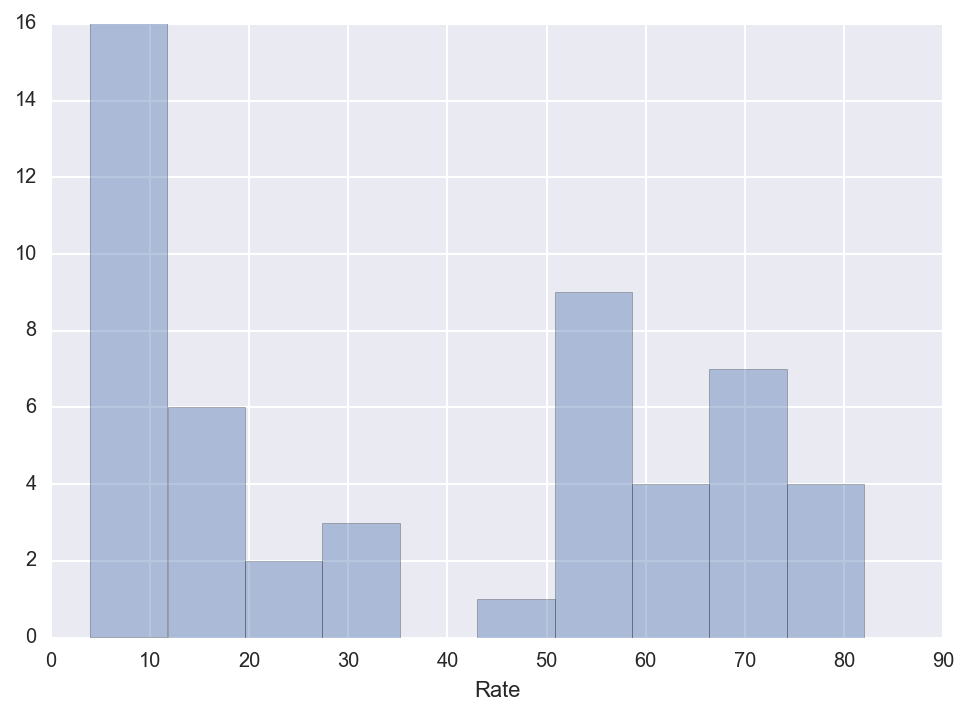

In [9]:
import seaborn as sns

rate_plot = sns.distplot(df['Rate'], kde=False, bins=10)

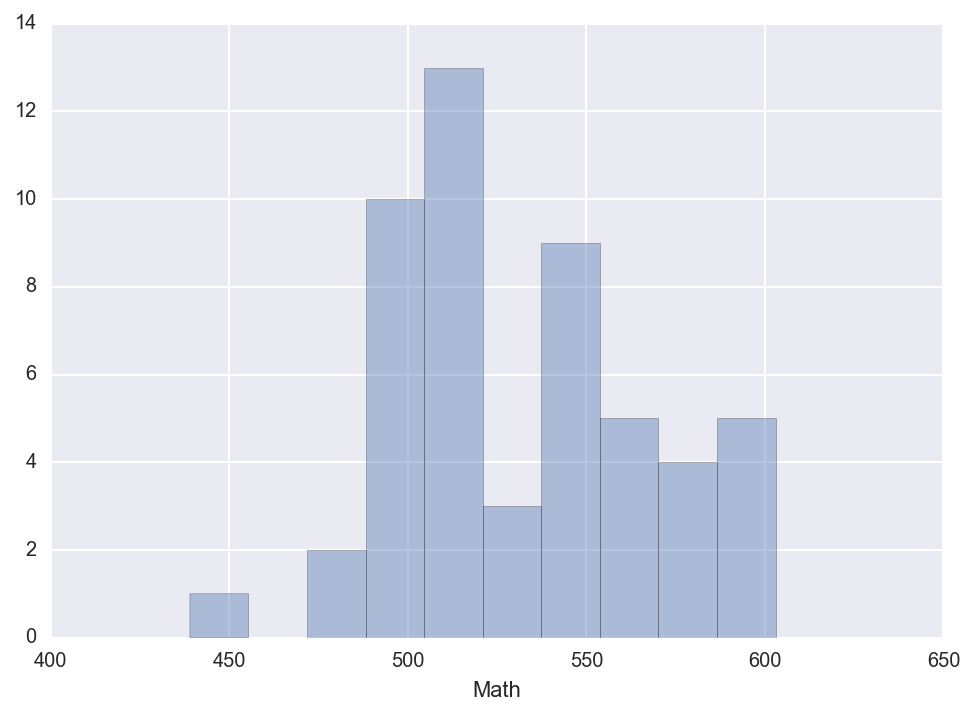

In [10]:
math_plot = sns.distplot(df['Math'], kde=False, bins=10)

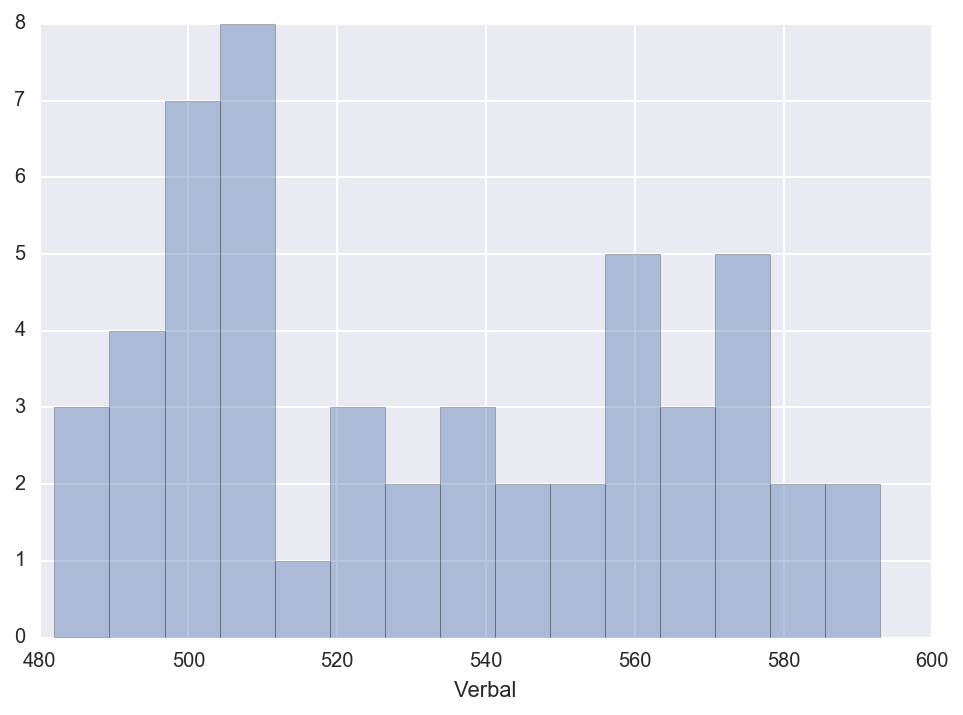

In [11]:
verbal_plot = sns.distplot(df['Verbal'], kde=False, bins=15)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

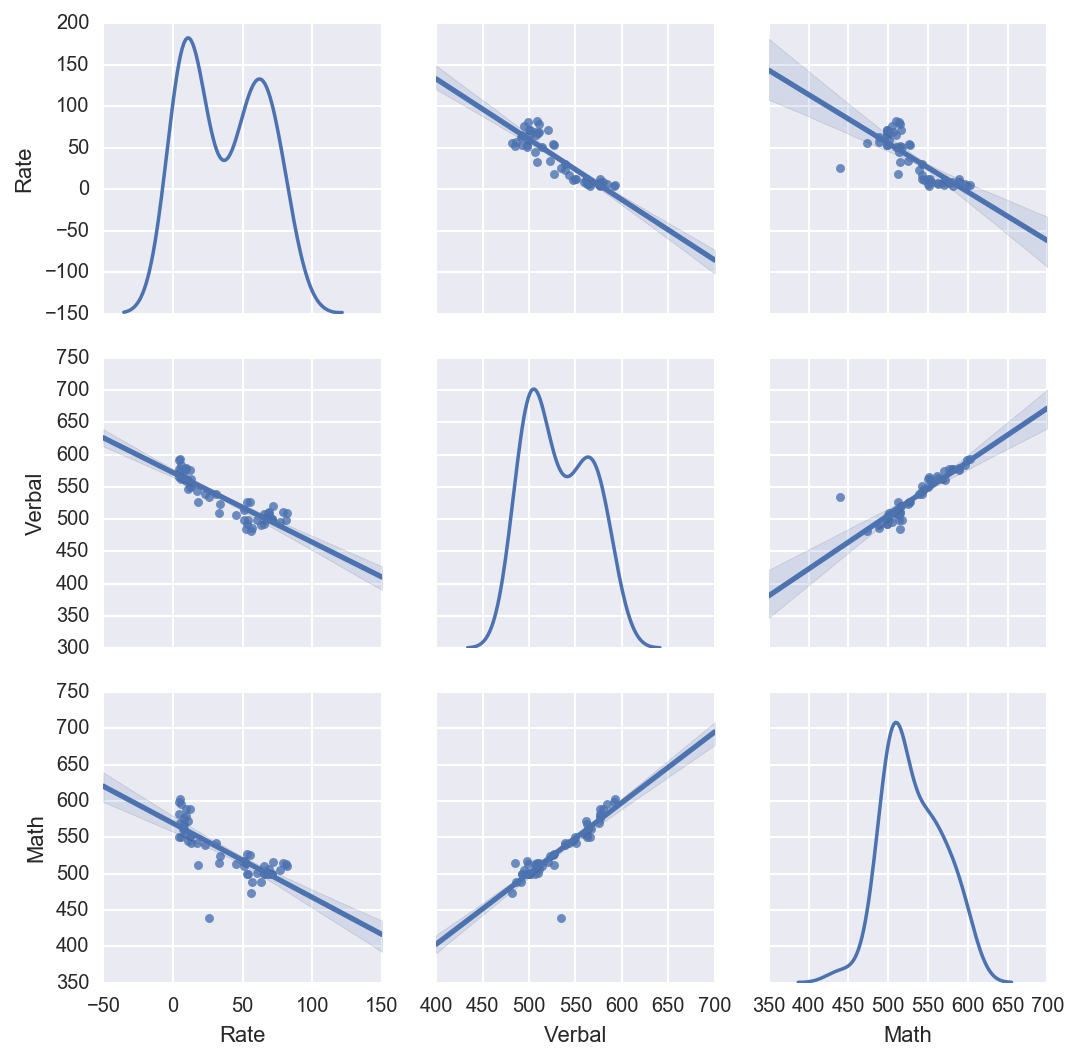

In [12]:
joint_dist_plot = sns.pairplot(df, diag_kind='kde', kind='reg')

### Explanation

There is a positive correlation that if the student has a higher verbal score, than the student has a higher math score.

The higher participation rate, the lower the average verbal and math score. Most likely because at lower participation rate states, the students may be more focused to do better since it is out of the norm. At higher participation rate states, it is the norm to take the SAT, which may cause more students taking the SAT. However, there is a higher variation of how focused and hardworking the student is, which may cause greater variance in the results.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

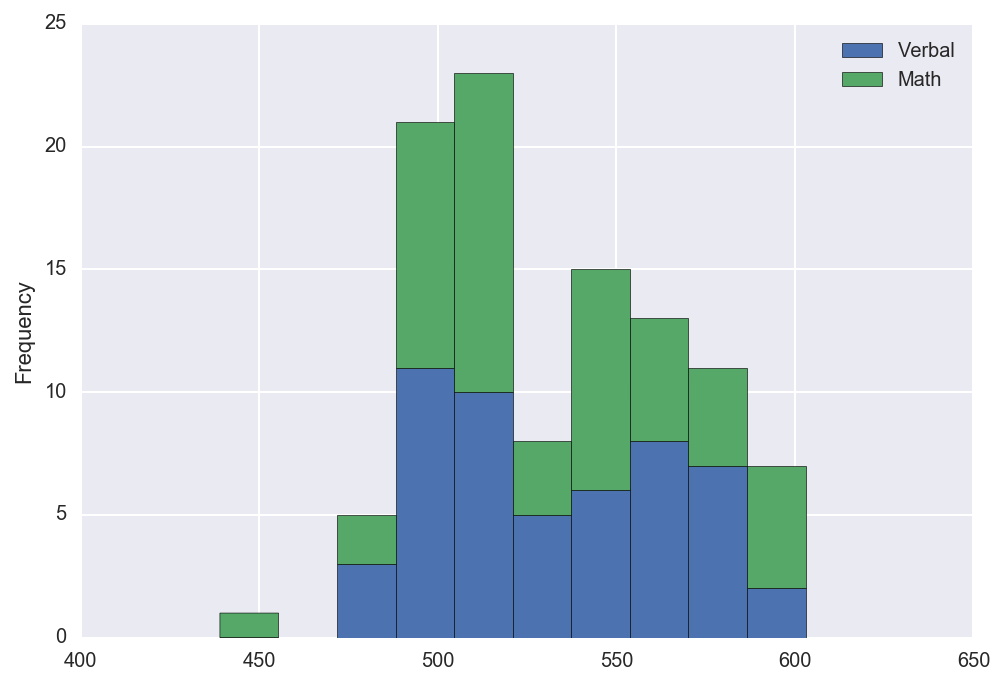

In [13]:
# Dropped Rate and created a new dataframe
df2 = df.drop('Rate', axis=1)
df2

stacked_bar = df2.plot.hist(df2, stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

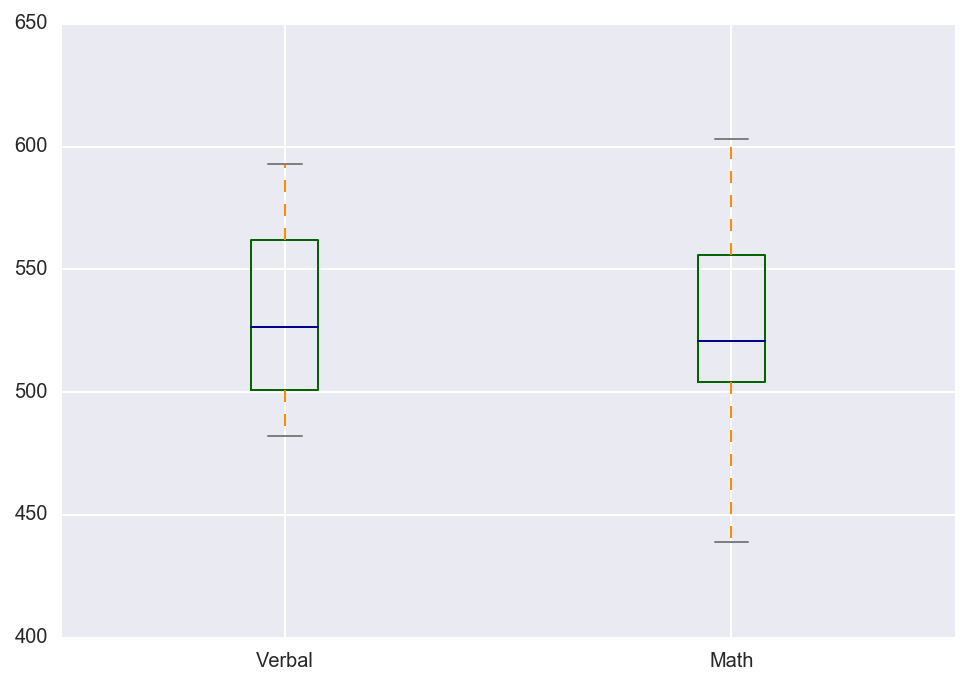

In [14]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
             
boxplot_plot = df2.plot.box(color=color)

### Benefits of Boxplot

A boxplot shows the differences between the min, max, 1st quartile, 3rd quartile and mean of each column. With this, we are able to compare the strengths of USA students in Math and Verbal. 

### Rate in Boxplot

We do not include the Rate in the same chart because the ranges of Rate is 0-100, compared to Math and Verbals 400-650, which causes the boxplot to be squished.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


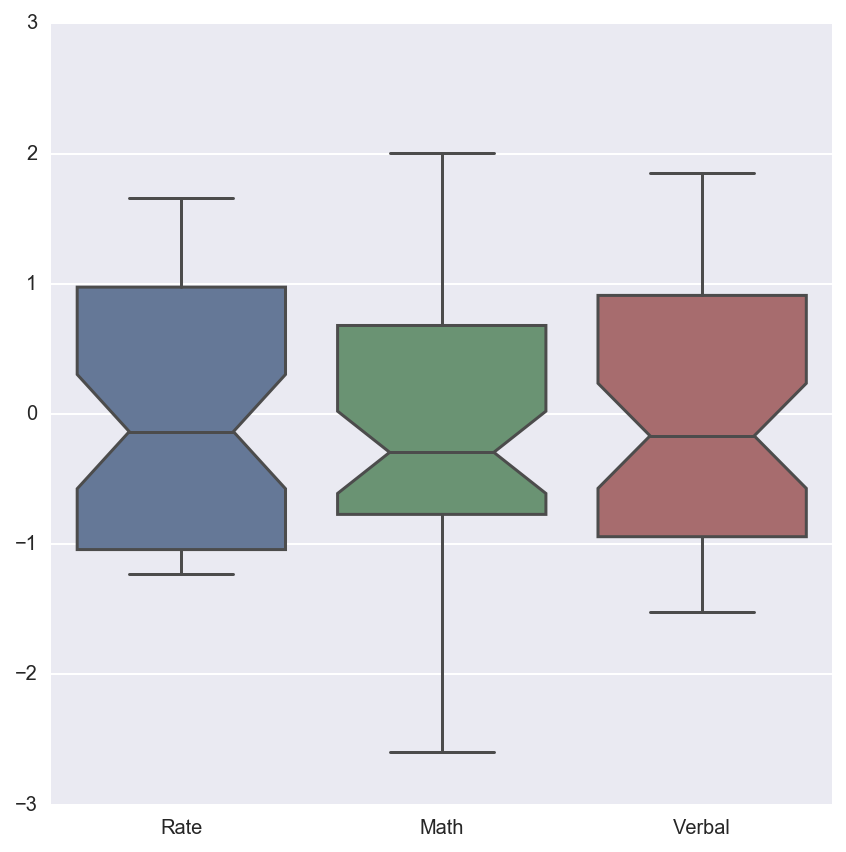

In [265]:
df_test = pd.read_csv(sat_filepath)
df_test = df[['Rate', 'Math', 'Verbal']]
df_test_norm = (df_test - np.mean(df_test)) / np.std(df_test)

fig = plt.figure(figsize=(7,7))
ax = fig.gca()

ax = sns.boxplot(data=df_test_norm, orient='v',
                fliersize=20, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [20]:
verbal_mean = np.mean(df['Verbal'])
verbal_mean

count = 0

for i in range(len(df)):
    if df.iloc[i][2] > verbal_mean:
        print df.iloc[i][0]
        count += 1

print 'Total number of states above mean: %s' % (count)
print "Half the country's verbal scores, based on state, is above the country's average."

CO
OH
MT
ID
TN
NM
IL
KY
WY
MI
MN
KS
AL
NE
OK
MO
LA
WI
AR
UT
IA
SD
ND
MS
Total number of states above mean: 24
Half the country's verbal scores, based on state, is above the country's average.


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [21]:
verbal_median = np.median(df['Verbal'])
verbal_median

count = 0

for i in range(len(df)):
    if df.iloc[i][2] > verbal_median:
        print df.iloc[i][0]
        count += 1

print 'Total number of states above median: %s' % (count)
print 'There are more states in the country above the median than there are states above the mean.'
print 'The distribution is skewed to the left. There are more numbers far lower from the median than there are far greater than the median.'

WA
CO
OH
MT
WV
ID
TN
NM
IL
KY
WY
MI
MN
KS
AL
NE
OK
MO
LA
WI
AR
UT
IA
SD
ND
MS
Total number of states above median: 26
There are more states in the country above the median than there are states above the mean.
The distribution is skewed to the left. There are more numbers far lower from the median than there are far greater than the median.


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [38]:
df['Verbal - Math'] = df['Verbal'] - df['Math']
df['Math - Verbal'] = df['Math'] - df['Verbal']

df_vm = df
df_vm.head(5)

,State,Rate,Verbal,Math,Verbal - Math,Math - Verbal
0,CT,82,509,510,-1,1
1,NJ,81,499,513,-14,14
2,MA,79,511,515,-4,4
3,NY,77,495,505,-10,10
4,NH,72,520,516,4,-4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [39]:
df_vm = df
df_vm = df_vm.drop('Verbal', axis=1)
df_vm = df_vm.drop('Rate', axis=1)
df_vm = df_vm.drop('Math', axis=1)
df_vm = df_vm.drop('Math - Verbal', axis=1)
df_vm = df_vm.sort_values('Verbal - Math', ascending=False)
df_vm = df_vm[0:10]
df_vm.head(3)

,State,Verbal - Math
27,OH,95
50,MS,15
29,WV,15


In [40]:
df_mv = df
df_mv = df_mv.drop('Verbal', axis=1)
df_mv = df_mv.drop('Rate', axis=1)
df_mv = df_mv.drop('Math', axis=1)
df_mv = df_mv.drop('Verbal - Math', axis=1)
df_mv = df_mv.sort_values('Math - Verbal', ascending=False)
df_mv = df_mv[0:10]
df_mv.head(3)

,State,Math - Verbal
21,HI,30
23,CA,19
1,NJ,14


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [135]:
df_corr = pd.read_csv(sat_filepath)
df_corr.corr(method='pearson')

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


### Explanation:
Verbal and Math are inversely correlated with Participation Rate.
Verbal and Math are positively correlated with each other.

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [144]:
df_corr.describe().T

,count,mean,std,min,25%,50%,75%,max
Rate,52.0,37.153846,27.301788,4.0,9.0,33.5,63.50,82.0
Verbal,52.0,532.019231,33.236225,482.0,501.0,526.5,562.00,593.0
Math,52.0,531.500000,36.014975,439.0,504.0,521.0,555.75,603.0


### Explanation:
1. Count is the frequency of data per column in the dataset
2. Mean is the average
3. Standard Deviation is the value from the mean
4. 1st deviation is 68.2%, 2nd deviation is 95%, 3rd deviation is 99.7% of the total dataset
5. Min is the smallest value in the column
6. 25% is the median between the min and the mean and 25th percentile
7. 50% is the median
8. 75% is the median between the mean and the max and the 75th percentile
9. max is the largest value in the column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [137]:
df_corr.cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


### Explanation:
##### Difference between covariance and correlation:
Correlation is a scaled version of the covariance from -1 to 1, and is specifically used to test whether 2 items are linearly correlated. Covariance is a measure of how changes in one variable are associated with changes in a second variable. Covariance is too difficult to measure by itself and really does not confidently give you a justification on how correlated 2 items are. Covariance needs to be divided by the sample standard deviation of both items, which provides the correlation coefficient. In other words, the correlation matrix. The correlation matrix is a much more prepared to indicate whether or not 2 items are linearly correlated.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets. The drug use dataset has many more variables than the sat dataset. The process for this dataset is more open-ended than the sat dataset.

You should use the techniques you applied above to practice more self-guided EDA here!

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [321]:
drug_data_filepath = '/Users/edwardlee/Desktop/DSI-SF-2-azedlee/drug-use-by-age.csv'

pd.set_option('display.max_columns', 30)

drug_df = pd.read_csv(drug_data_filepath)
drug_df

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,7.0,4.0,1.8,4.0,9.2,12.0,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0,8.6,3.0,1.4,3.0,9.4,12.0,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,7.4,2.0,1.5,4.0,10.0,10.0,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,30.0,6.3,4.0,1.4,2.0,9.0,15.0,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


### Explanation:
1. The data requires cleaning
2. There are missing values
3. Without data munging, missing values will cause issues with hypothesis testing and modeling

### 7.2 Do a high-level, initial overview of the data

 and take a look at the column variables. Get a feel for what this dataset is all about. The code you use to do this is "up to you", as in you will apply processes you have learned above.

The final response to this question should be a written description of what you deduce and infer the dataset to describe. 

In [322]:
# Changed all dashes to numeric 0
for i in drug_df.columns:
    drug_df[i] = drug_df[i].replace('-', 0.0)
    
drug_df

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,0,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,7.0,4.0,1.8,4.0,9.2,12.0,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0,8.6,3.0,1.4,3.0,9.4,12.0,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,7.4,2.0,1.5,4.0,10.0,10.0,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,30.0,6.3,4.0,1.4,2.0,9.0,15.0,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

In [47]:
# Use - Percentage of those in an age group who used DRUG in the past 12 months
# Frequency - Median number of times a user in an age group used DRUG in the past 12 months

### Hypothesis:
In the past 12 months, at the age group of 20, alcohol usage is the highest percentage in all drugs.

### Deliverables:
I will be either accepting or rejecting the Null hypothesis and explain why result happened.

In [323]:
drug_df.loc[8]

tester = []
for i in range(len(drug_df)):
    if i*2 < 18:
        tester.append(i*2)
        
tester = tester[2:]
tester

for i in tester:
    if drug_df.loc[8][2] < drug_df.loc[8][i]:
        print False
    else:
        print 'Alcohol wins'

Alcohol wins
Alcohol wins
Alcohol wins
Alcohol wins
Alcohol wins
Alcohol wins
Alcohol wins


In [251]:
drug_df_plot = drug_df.iloc[[8]]
drug_df_plot.drop(['n', 'alcohol-frequency', 'marijuana-frequency','cocaine-frequency','crack-frequency','heroin-frequency','hallucinogen-frequency','inhalant-frequency','pain-releiver-frequency','oxycontin-frequency','tranquilizer-frequency','stimulant-frequency','meth-frequency','sedative-frequency'], axis=1, inplace=True)

/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [253]:
drug_df_plot.drop(['age'], axis=1, inplace=1)

/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


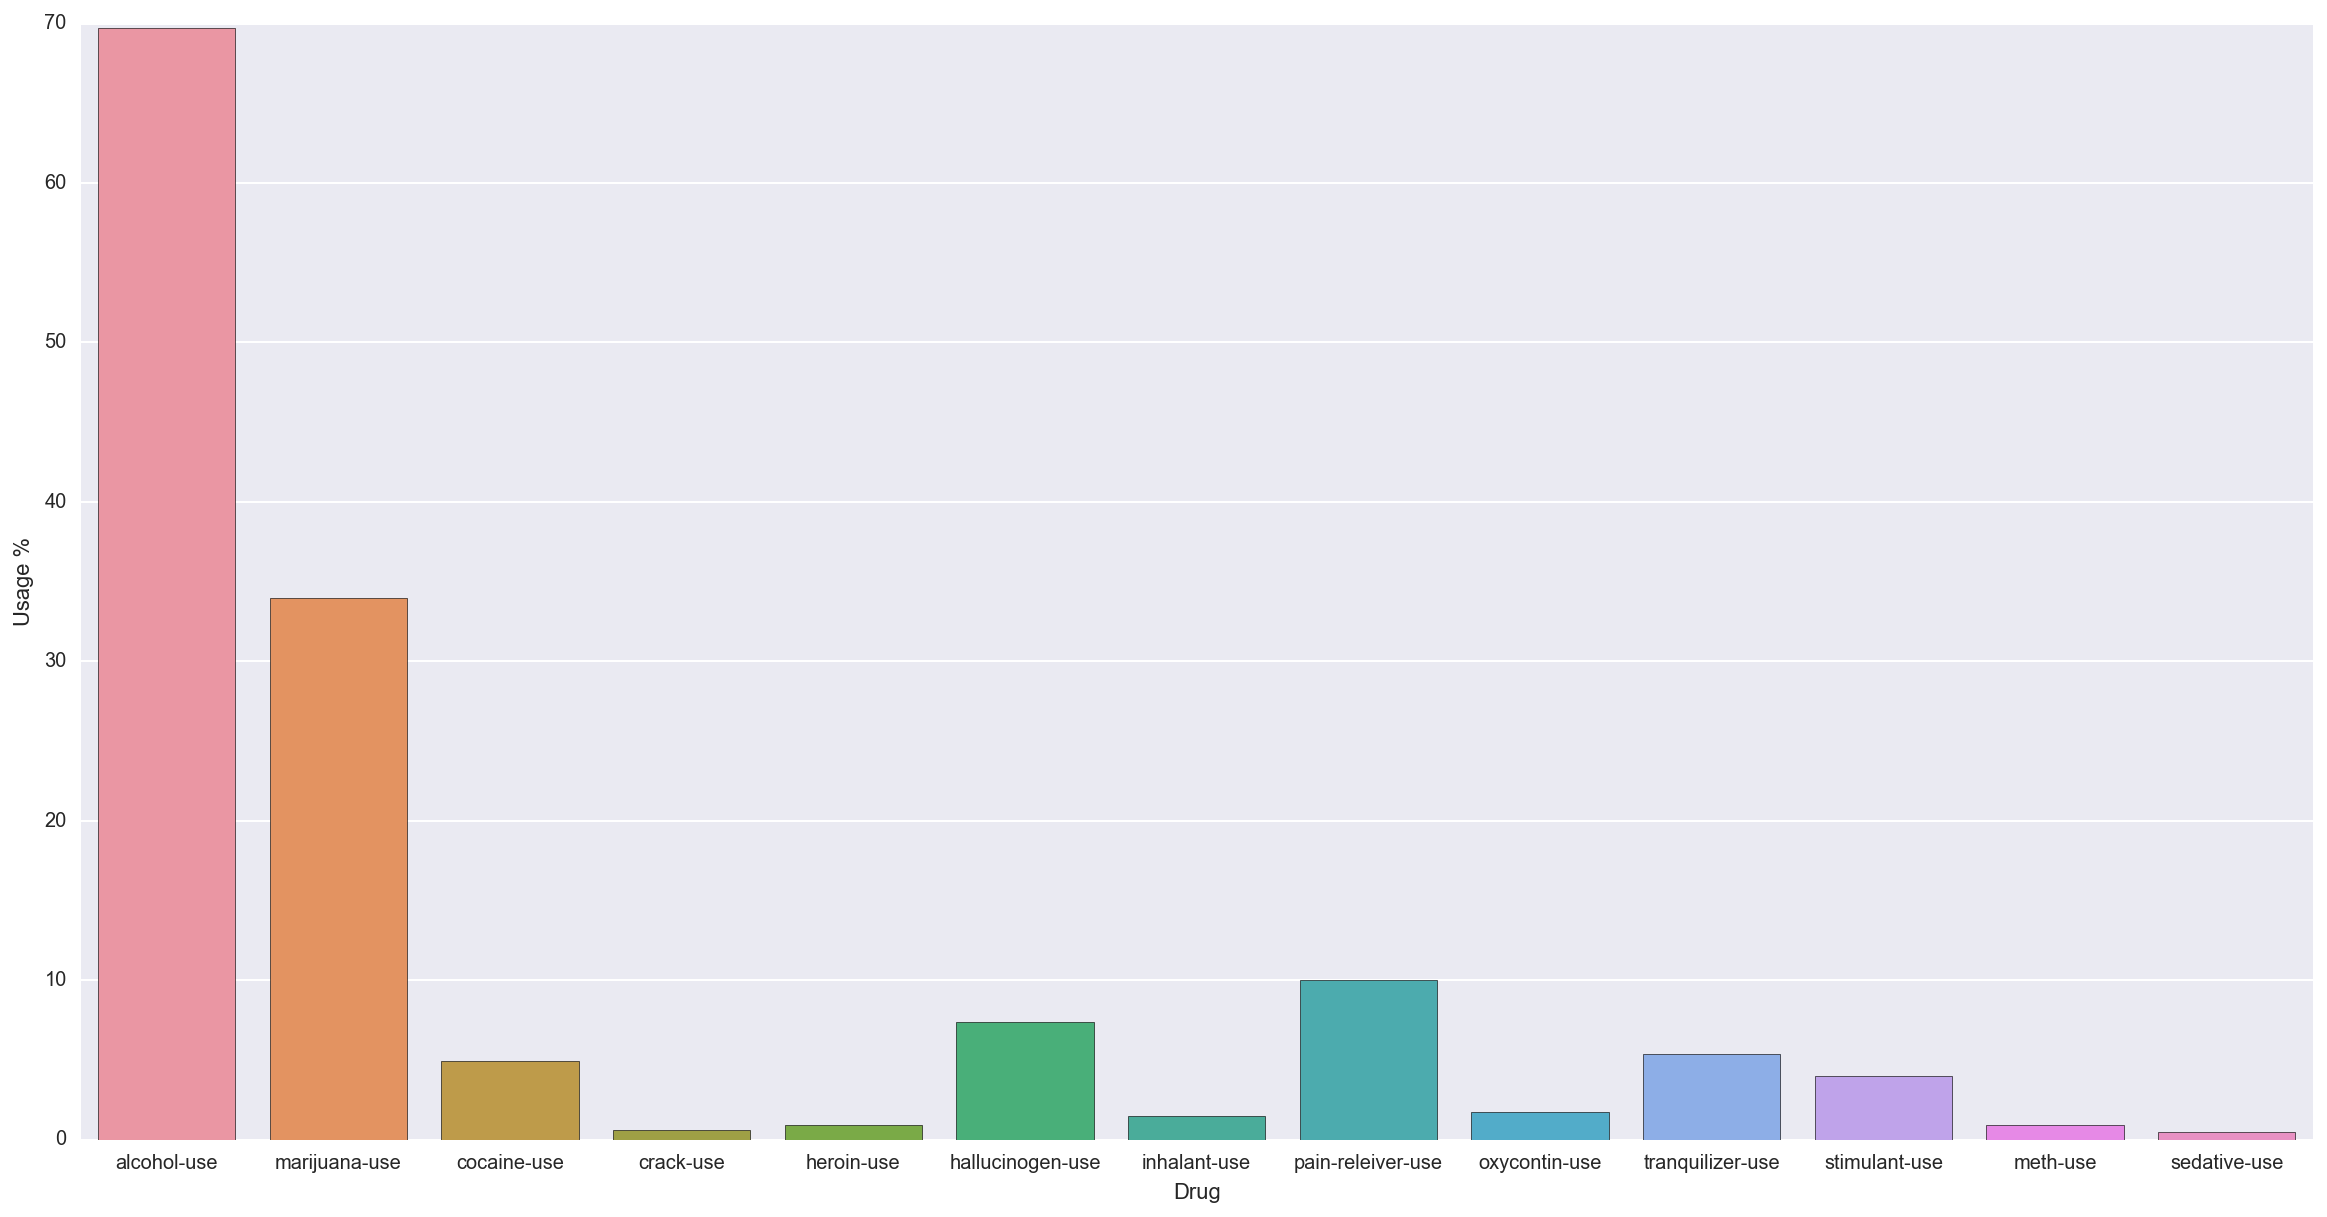

In [279]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca()

ax = sns.barplot(data=drug_df_plot, ax=ax)
ax = sns.axlabel('Drug', 'Usage %')

### Result:
My hypothesis was correct. My first assumption to any drugs and alcohol is before the age of 20, most kids would be curious and drink alcohol. However, I was not entirely sure whether or not kids would turn to use a different kind of drug, or drugs, while waiting to be actually legal drink alcohol.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Covariance and correlation

---

### 8.1 Return to the sat dataset

**Go back to the sat dataset.**

1. Create the covariance matrix for the non-State variables. There are pandas and numpy functions that can do this.
2. What is the difference between the covariance and correlation matrix?
3. Why is the correlation matrix preferred to the covariance matrix for EDA?

In [29]:
df_sat = pd.read_csv(sat_filepath)
df_sat[['Rate','Verbal','Math']].cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


In [143]:
df_sat[['Rate','Verbal','Math']].corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


### Explanation:
##### Difference between covariance and correlation:
Correlation is a scaled version of the covariance from -1 to 1, and is specifically used to test whether 2 items are linearly correlated. Covariance is a measure of how changes in one variable are associated with changes in a second variable. Covariance is too difficult to measure by itself and really does not confidently give you a justification on how correlated 2 items are. Covariance needs to be divided by the sample standard deviation of both items, which provides the correlation coefficient. In other words, the correlation matrix. The correlation matrix is a much more prepared to indicate whether or not 2 items are linearly correlated.

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 8.2 Deeper into covariance and correlation

1. How is the covariance matrix calculated?
2. How is the correlation matrix calculated?
3. Based on the explicit formulas, what is the primary differences between the two? 



<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 8.3 Manual calculation of the covariance and correlation

Create two functions that accept a matrix/DataFrame of numeric columns.

1. Write a function that manually calculates the covariance matrix.
2. Write a function that manually calculates the correlation matrix.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


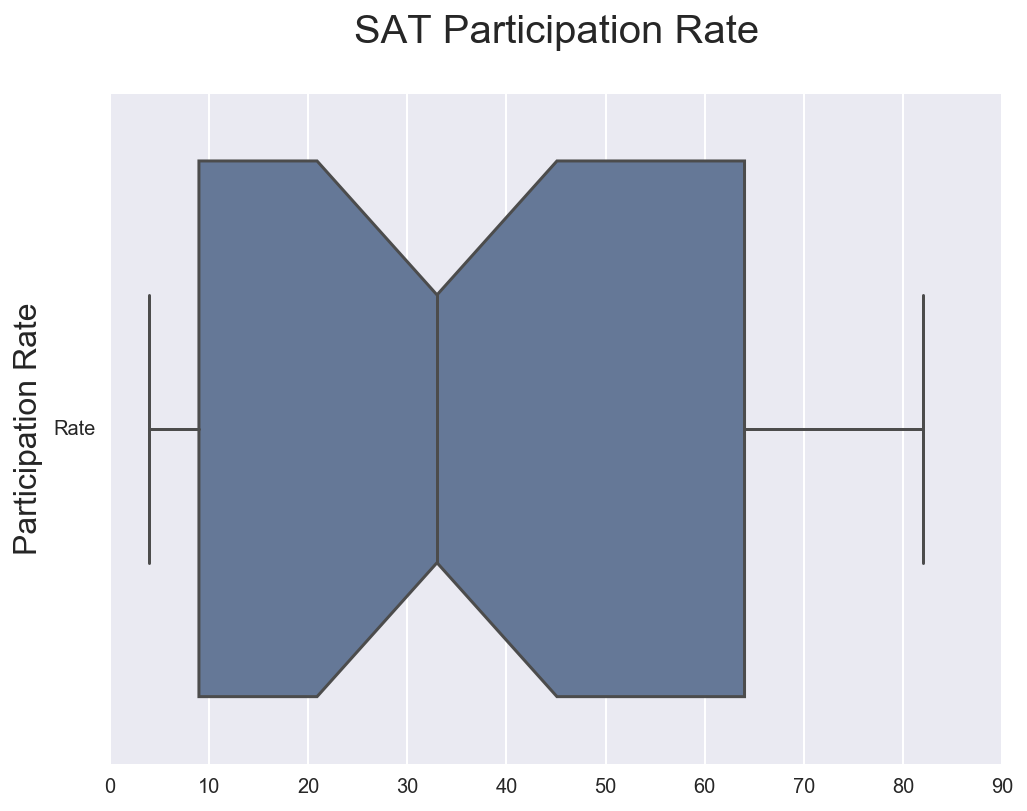

In [49]:
# Created a dataframe with only Rate
df_sat_rate = pd.DataFrame(df_sat['Rate'])

# Removed last row - 'Total'
df_sat_rate = df_sat_rate[0:51]

# Plot Dataset in Boxplot and increase fliersize to see if there are any outliers
df_sat_rate.describe()
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

ax = sns.boxplot(df_sat_rate, orient='h',
                fliersize=20, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_ylabel('Participation Rate', fontsize=16)
ax.set_title('SAT Participation Rate\n', fontsize=20)

In [ ]:
# 2 SD Method/z-score
# 3 SD Method/z-score
# Tukey's Method (1.5 IQR)
# Tukey's Method (3 IQR)
# Adjusted Boxplot
# 2 MADe
# 3 MADe
# Median Rule

In [50]:
df_sat_rate.describe()

,Rate
count,51.000000
mean,37.000000
std,27.550681
min,4.000000
25%,9.000000
50%,33.000000
75%,64.000000
max,82.000000


<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10. Percentile scoring and spearman rank correlation

---

### 10.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [222]:
df_sat_vm = pd.read_csv(sat_filepath)
df_sat_vm.drop('Rate', axis=1, inplace=True)

In [223]:
print 'Spearman: \n'
print df_sat_vm.corr(method='spearman'), '\n'
print 'Pearson: \n'
print df_sat_vm.corr(method='pearson')

Spearman: 

          Verbal      Math
Verbal  1.000000  0.905205
Math    0.905205  1.000000 

Pearson: 

          Verbal      Math
Verbal  1.000000  0.899871
Math    0.899871  1.000000


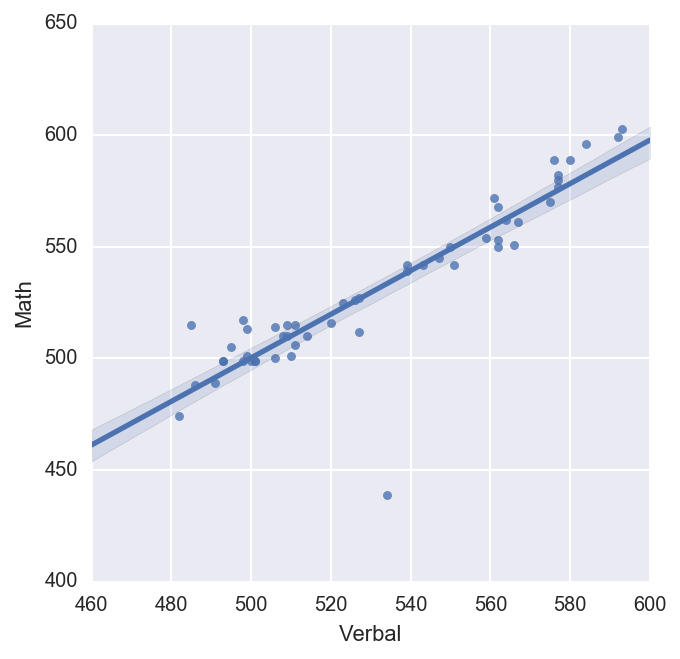

In [226]:
# Plot scatter
fig = plt.figure(figsize=(5,5))
ax = fig.gca()

ax = sns.regplot(x='Verbal', y='Math', data=df_sat_vm)

### Comparison:
The Pearson Correlation is slightly higher than the Spearman Correlation, although they are very fairly close. The magnitude between data points is not large enough to cause the Pearson Correlation to skew, which in result, shows a much more positively linear correlation

### Describe clearly in words the process of calculating the spearman rank correlation:

The 'Spearman Rank' ranks all the values (largest in 2 lists from 1 to however long. After ranking them, the values are then subtracted and squared (d^2). Then, all d^2 are added together, multiplied by 6 and divided by the number of sites, n, at which you took the measurements (n^3 - n). Finally, the entire equation is subtracted from 1. A positive number closer to 1 yields a positive correlation, a negative number closer to -1 yields a negative correlation and a number closer to 0 yields little to no correlation.

For example: Math and Verbal are ranked from 1-52 (smallest to largest value). The scores are then subtracted, squared and added together. The number is then multiplie by 6 and then divided by (52^3 - 52). The entirety is then subtract from 1. Since the result was 0.905205, I can conclude that there is a very positive relationship between Math and Verbal.

Equation:

R = 1 - (6∑d^2/(n^3-n))

### 10.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [34]:
# Participation Rate is out of 100
df_sat_per = df_sat
df_sat_per

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [37]:
df_sat_per['Rate Percentile'] = [stats.percentileofscore(df_sat_per['Rate'], a, 'rank') for a in df_sat_per['Rate']]
df_sat_per

,State,Rate,Verbal,Math,Rate Percentile
0,CT,82,509,510,100.000000
1,NJ,81,499,513,98.076923
2,MA,79,511,515,96.153846
3,NY,77,495,505,94.230769
4,NH,72,520,516,92.307692
5,RI,71,501,499,89.423077
6,PA,71,500,499,89.423077
7,VT,69,511,506,85.576923
8,ME,69,506,500,85.576923
9,VA,68,510,501,82.692308


In [38]:
california_mask = (df_sat_per['State'] == 'CA')
df_sat_per[california_mask]['Rate Percentile']

23    56.730769
Name: Rate Percentile, dtype: float64

### Percentile is related to the spearman rank correlation:

Percentile is the value's position or 'rank' compared to the rest of the list, which directly relates to Spearman's Rank calculations. It is possible to use percentile as a value to guesstimate the value's rank.

### 10.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

### Percentile scoring is useful dealing with outliers:

It is possible to see specific percentiles that are obviously much higher or lower than the rest of the pack. For example, if most points are in the 50th percentile and there is 1 value at the 99th percentile and 1 value at the 1st percentile, it might be easy to conclude that those 2 values are potential outliers.

In [5]:
drug_data_filepath = '/Users/edwardlee/Desktop/DSI-SF-2-azedlee/drug-use-by-age.csv'

pd.set_option('display.max_columns', 30)

drug_df_2 = pd.read_csv(drug_data_filepath)

In [6]:
drug_df_2.head(1)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0


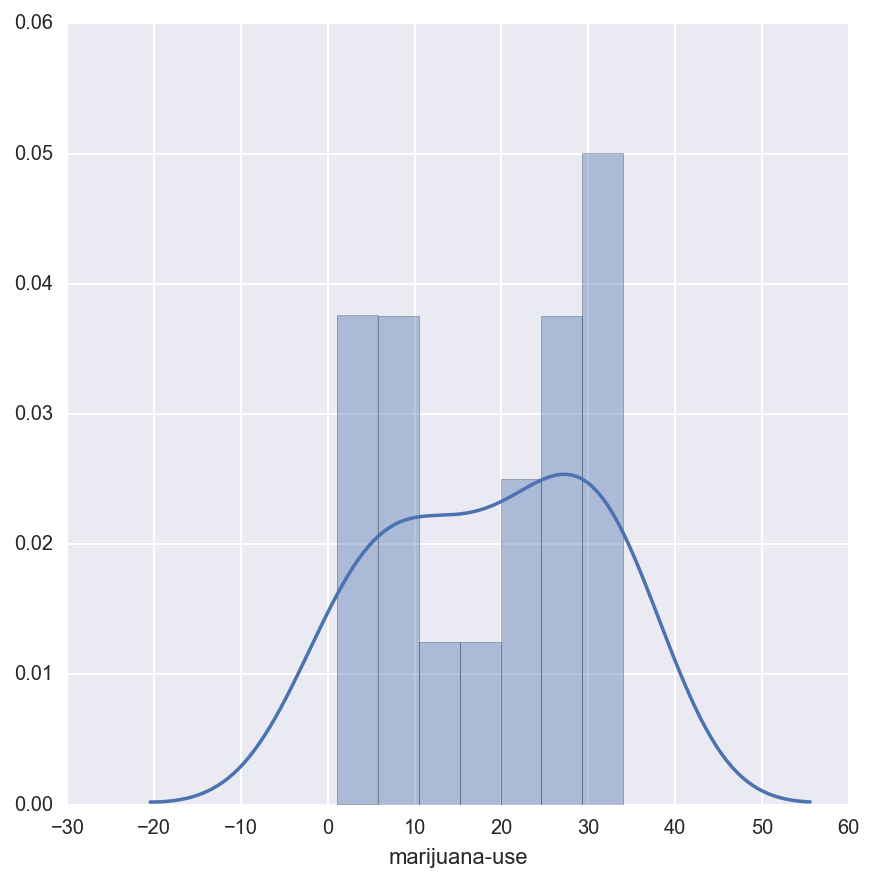

In [7]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()

ax = sns.distplot(drug_df_2['marijuana-use'], bins=7)

In [8]:
drug_df_marijuana = drug_df_2['marijuana-use']

In [9]:
drug_df_marijuana.sort_values().reset_index(drop=True)

0      1.1
1      1.2
2      3.4
3      7.3
4      8.7
5     10.4
6     14.5
7     16.4
8     20.8
9     22.5
10    24.9
11    28.0
12    28.4
13    33.0
14    33.4
15    33.7
16    34.0
Name: marijuana-use, dtype: float64

In [25]:
drug_df_marijuana = [stats.percentileofscore(drug_df_marijuana, a, 'rank') for a in drug_df_marijuana]
drug_df_marijuana

[5.8823529411764701,
 17.647058823529413,
 29.411764705882355,
 41.17647058823529,
 58.82352941176471,
 70.588235294117652,
 94.117647058823522,
 88.235294117647058,
 100.0,
 82.35294117647058,
 76.470588235294116,
 64.705882352941174,
 52.941176470588239,
 47.058823529411761,
 35.294117647058826,
 23.52941176470588,
 11.76470588235294]

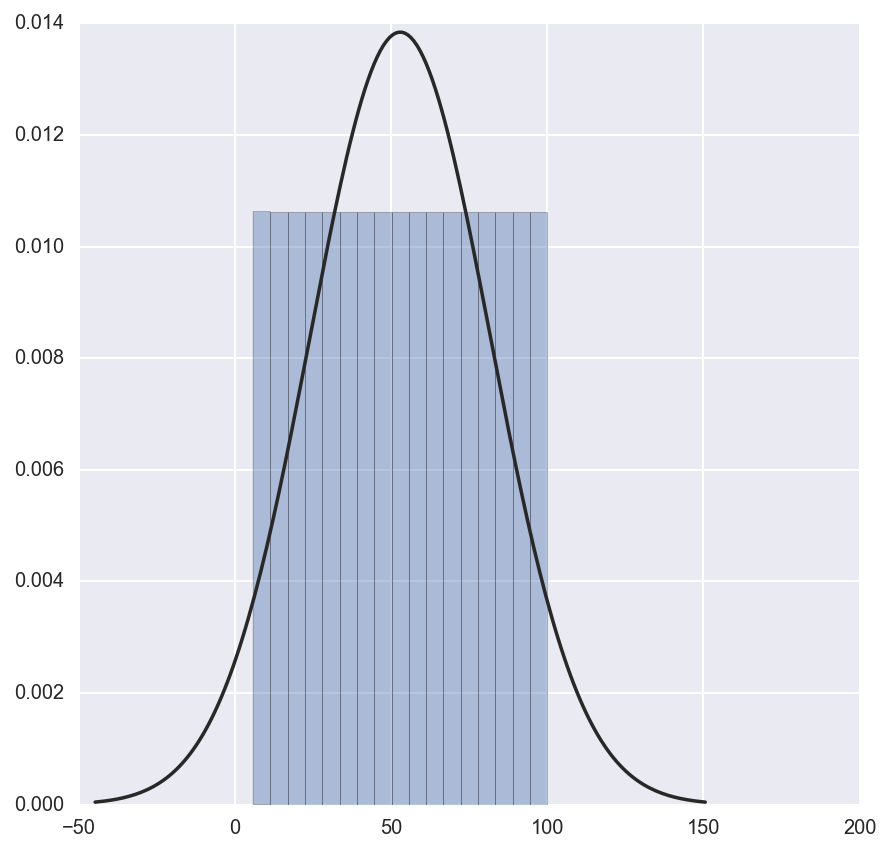

In [46]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()

# ax = sns.distplot(drug_df_marijuana, kde=False, fit=stats.gamma, bins=17)
ax = sns.regplot()

### Describe the effect, visually, of coverting raw scores to percentile

It is evenly distributed from 0 to 100.